In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.ticker as ticker
import matplotlib.dates as dt

import datetime
from datetime import datetime

In [2]:
# Read data
txt = "DOH COVID Data Drop_ 20210820 - 04 Case Information.csv"
data = pd.read_csv(txt) 

In [3]:
# Extract date from name of csv file

date = txt.split()[4]
date = list(date)
date.insert(4, '-')
date.insert(7, '-')
date = ''.join(date)

# New Cases per Day

In [4]:
def plotter_new_cases(df, title):
    '''
    Plots new cases per day.
    df: raw data
    title: Title of the Plot
    
    '''
    # Convert DateRepConf to datetime
    df['DateRepConf'] = pd.to_datetime(df.DateRepConf)

    # Chronological rows
    df.sort_values(by='DateRepConf', inplace=True)

    # Count cases
    new_cases_df = pd.DataFrame(df['DateRepConf'].value_counts())
    new_cases_df.sort_index(inplace=True)

    # Moving average
    new_cases_df['moving_ave'] = new_cases_df.rolling(window=7).mean()

    
    # Vertical line plot
    for i in range(0, len(new_cases_df)):
        ax.vlines(new_cases_df.index[i], 0, new_cases_df.DateRepConf[i], lw=0.08, colors ="#11b8cb")

    # Moving average
    ax.plot(new_cases_df.index, new_cases_df.moving_ave, lw=1.2, color="#ff6300", label="7-day average")
    ax.set_xlim([datetime.strptime('Mar 1 2020', '%b %d %Y'), datetime.strptime(date, '%Y-%m-%d')])

    # ax.xaxis.set_major_locator(dt.MonthLocator())
    # ax.xaxis.set_major_formatter(dt.DateFormatter('%b'))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # https://matplotlib.org/2.0.2/examples/api/date_demo.html
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%b\n%Y')
    monthsFmt = mdates.DateFormatter('%b')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt) 

    ax.tick_params(axis="x", which="both", rotation=40, labelsize=9)
    ax.tick_params(axis="y", which="both", labelsize=9)

    ax.set_title("{} New Cases per Day as of {}".format(title, date))
    ax.legend(loc=2)

# Epidemiologic curve of the Philippines

<IPython.core.display.Javascript object>


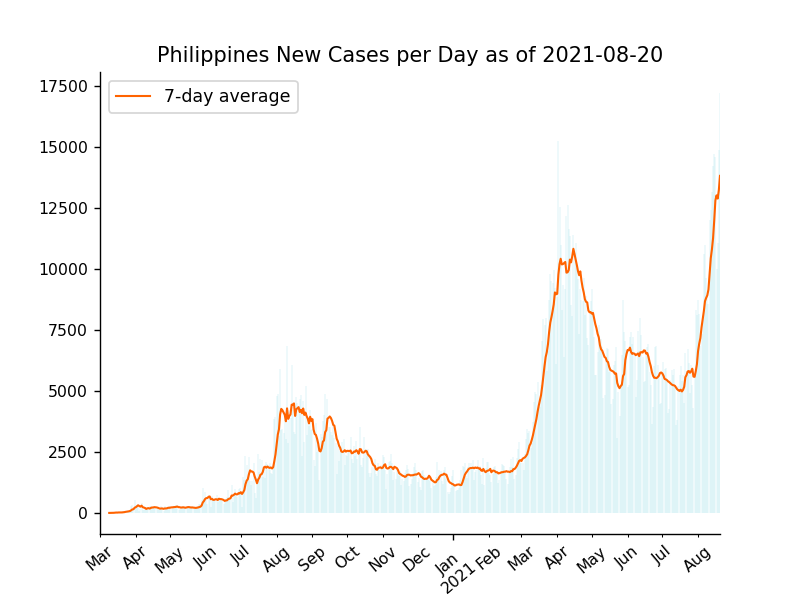

<ipython-input-4-87c860017ba3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateRepConf'] = pd.to_datetime(df.DateRepConf)
C:\Users\tonba\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [5]:
# Entire Philippines
df = data[["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Philippines")
plt.savefig("PH_New_Cases", dpi=300)

# New Deaths per Day (REVISE DAY OF DEATH)

In [6]:
def plotter_new_deaths(df, title):
    '''
    Plots new deaths per day.
    df: raw data
    title: Title of the Plot
    
    '''
    # Can also use DateRepConf or DateDied
    # Convert DateDied to datetime
    df['DateDied'] = pd.to_datetime(df.DateDied)

    # Chronological rows
    df.sort_values(by='DateDied', inplace=True)

    # Count cases
    new_deaths_df = pd.DataFrame(df['DateDied'].value_counts())
    new_deaths_df.sort_index(inplace=True)

    # Moving average
    new_deaths_df['moving_ave'] = new_deaths_df.rolling(window=7).mean()

    
    # Vertical line plot
    for i in range(0, len(new_deaths_df)):
        ax.vlines(new_deaths_df.index[i], 0, new_deaths_df.DateDied[i], lw=0.05, colors ="black")

    # Moving average
    ax.plot(new_deaths_df.index, new_deaths_df.moving_ave, lw=1.0, color="red", label="7-day average")
    plt.xticks(rotation=50)

    ax.xaxis.set_major_locator(dt.MonthLocator())
    ax.xaxis.set_major_formatter(dt.DateFormatter('%b %y'))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("{} New Deaths per Day as of {}".format(title, date))
    ax.legend(loc=2)

<IPython.core.display.Javascript object>


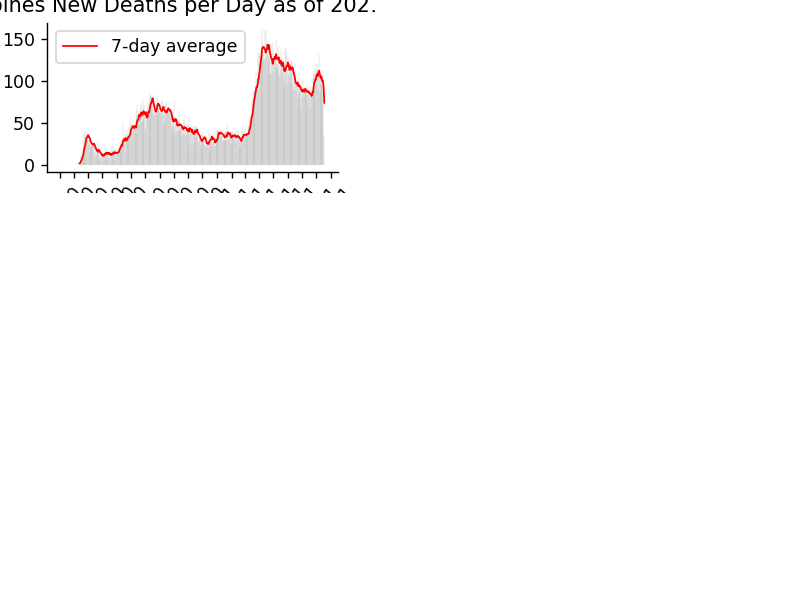

In [7]:
df = data[data["RemovalType"] == "DIED"][["DateDied", "ProvRes"]]

fig, ax = plt.subplots()
plotter_new_deaths(df, "Philippines")

## Cebu Island (includes Mactan Island)

<IPython.core.display.Javascript object>


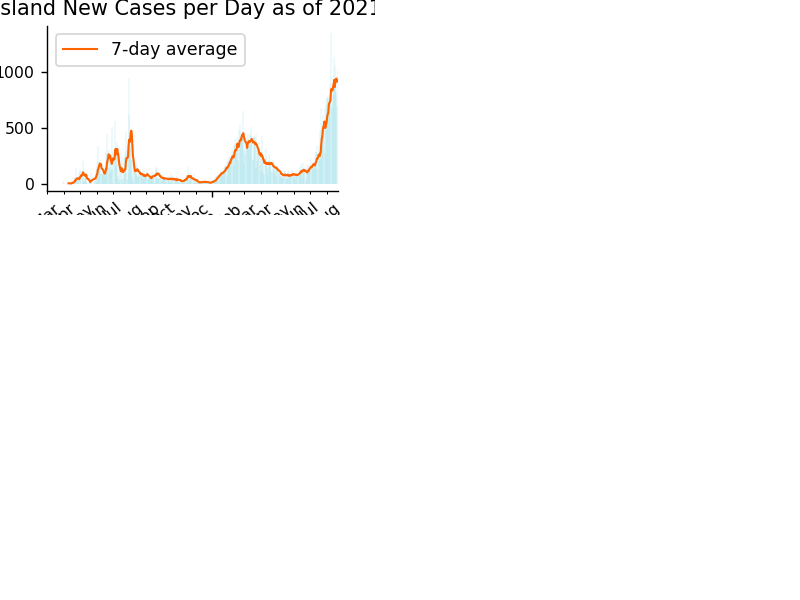

In [8]:
# Cebu Island
df = data[data["ProvRes"] == "CEBU"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cebu Island")
plt.savefig("Provinces/Cebu_New_Cases", dpi=300)

## NCR

<IPython.core.display.Javascript object>


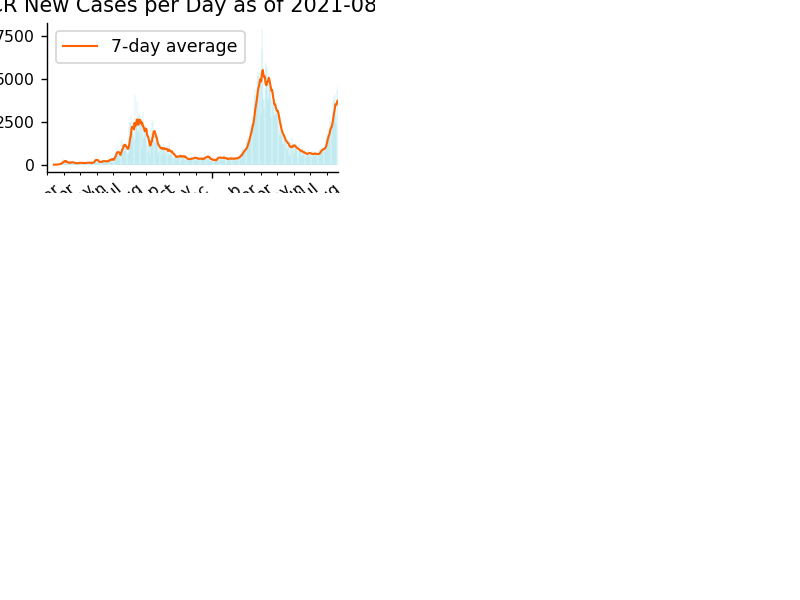

In [9]:
# NCR
df = data[data["ProvRes"] == "NCR"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "NCR")
plt.savefig("Provinces/NCR_New_Cases", dpi=300)

# Region 4-A

In [10]:
# CALABARZON
df = data[data["RegionRes"] == "Region IV-A: CALABARZON"][["DateRepConf", "RegionRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "CALABARZON")
plt.savefig("Provinces/CALABARZON_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

## Leyte

In [11]:
# Leyte
df = data[data["ProvRes"] == "LEYTE"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Leyte")
plt.savefig("Provinces/Leyte_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

## Negros Oriental

In [12]:
# Leyte
df = data[data["ProvRes"] == "NEGROS ORIENTAL"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Negros Oriental")
plt.savefig("Provinces/Negros Oriental_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

## Davao del Sur (includes Davao City)

In [13]:
# Davao del Sur
df = data[data["ProvRes"] == "DAVAO DEL SUR"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Davao del Sur")
plt.savefig("Provinces/Davao del Sur_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

## Iloilo

In [14]:
# Iloilo
df = data[data["ProvRes"] == "ILOILO"][["DateRepConf", "ProvRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Iloilo")
plt.savefig("Provinces/Iloilo_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Cities

In [15]:
np.set_printoptions(threshold=np.inf)
data["CityMunRes"].unique()

array([nan, 'LAOAG CITY (CAPITAL)', 'AGOO', 'MALASIQUI', 'ANGADANAN',
       'CABAGAN', 'DINALUPIHAN', 'SANTA MARIA', 'CANDABA',
       'CITY OF SAN FERNANDO (CAPITAL)', 'CITY OF TARLAC (CAPITAL)',
       'MABINI', 'SANTO TOMAS', 'IMUS CITY', 'PILA',
       'CITY OF ANTIPOLO (CAPITAL)', 'JALA-JALA', 'SAN MATEO',
       'DARAGA (LOCSIN)', 'SAN ENRIQUE', 'BACOLOD CITY (CAPITAL)',
       'SILAY CITY', 'CEBU CITY (CAPITAL)', 'MANDAUE CITY', 'MINGLANILLA',
       'CITY OF TALISAY', 'DUMAGUETE CITY (CAPITAL)', 'MARABUT',
       'ZAMBOANGA CITY', 'SAPAD', 'CAGAYAN DE ORO CITY (CAPITAL)',
       'CITY OF TAGUM (CAPITAL)', 'DAVAO CITY', 'PADADA', 'KABACAN',
       'GENERAL SANTOS CITY (DADIANGAS)', 'CITY OF MANDALUYONG',
       'CITY OF MARIKINA', 'CITY OF PASIG', 'QUEZON CITY',
       'CALOOCAN CITY', 'CITY OF VALENZUELA', 'CITY OF MAKATI',
       'BAGUIO CITY', 'COTABATO CITY', 'BALIUAG', 'CITY OF MANILA',
       'NAGA CITY', 'CITY OF NAVOTAS', 'DUMALNEG', 'BACARRA', 'PASUQUIN',
       'SAN N

# NCR Cities

In [16]:
# Manila
df = data[data["CityMunRes"] == "CITY OF MANILA"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Manila City")
plt.savefig("NCR Cities/Manila City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [17]:
# Quezon City
df = data[data["CityMunRes"] == "QUEZON CITY"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Quezon City")
plt.savefig("NCR Cities/Quezon City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [18]:
# Marikina City
df = data[data["CityMunRes"] == "CITY OF MARIKINA"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Marikina City")
plt.savefig("NCR Cities/Marikina City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [19]:
# Makati City
df = data[data["CityMunRes"] == "CITY OF MAKATI"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Makati City")
plt.savefig("NCR Cities/Makati City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [20]:
# Pasig City
df = data[data["CityMunRes"] == "CITY OF PASIG"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Pasig City")
plt.savefig("NCR Cities/Pasig City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [21]:
# San Juan City
df = data[data["CityMunRes"] == "CITY OF SAN JUAN"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "San Juan City")
plt.savefig("NCR Cities/San Juan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [22]:
# Pateros City
df = data[data["CityMunRes"] == "PATEROS"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Pateros City")
plt.savefig("NCR Cities/Pateros City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [23]:
# Las Pinas
df = data[data["CityMunRes"] == "CITY OF LAS PIÑAS"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Las Piñas City")
plt.savefig("NCR Cities/Las Piñas City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [24]:
# Mandaluyong City
df = data[data["CityMunRes"] == "CITY OF MANDALUYONG"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Mandaluyong City")
plt.savefig("NCR Cities/Mandaluyong City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [25]:
# Navotas City
df = data[data["CityMunRes"] == "CITY OF NAVOTAS"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Navotas City")
plt.savefig("NCR Cities/Navotas City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [26]:
# Parañaque City
df = data[data["CityMunRes"] == "CITY OF PARAÑAQUE"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Parañaque City")
plt.savefig("NCR Cities/Parañaque City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [27]:
# Pasay City
df = data[data["CityMunRes"] == "PASAY CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Pasay City")
plt.savefig("NCR Cities/Pasay City_New_Cases", dpi=300)

<ipython-input-27-4fcef1fcb9ed>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>

In [28]:
# Taguig City
df = data[data["CityMunRes"] == "TAGUIG CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Taguig City")
plt.savefig("NCR Cities/Taguig City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [29]:
# Muntinlupa City
df = data[data["CityMunRes"] == "CITY OF MUNTINLUPA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Muntinlupa City")
plt.savefig("NCR Cities/Muntinlupa City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [30]:
# Valenzuela City
df = data[data["CityMunRes"] == "CITY OF VALENZUELA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Valenzuela City")
plt.savefig("NCR Cities/Valenzuela City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [31]:
# Caloocan City
df = data[data["CityMunRes"] == "CALOOCAN CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Caloocan City")
plt.savefig("NCR Cities/Caloocan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [32]:
# Malabon City
df = data[data["CityMunRes"] == "CITY OF MALABON"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Malabon City")
plt.savefig("NCR Cities/Malabon City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Visayas Cities

Region 6:
    Kalibo City
    Roxas City
    Iloilo City
    Bacolod City
    
Region 7:
    Cebu City
    Mandaue City
    Lapu-Lapu City
    Talisay City
    Consolacion City
    Dumaguete City
    Tagbilaran City
    
Region 8:
    Ormoc City
    Tacloban City
    Maasin City
    Naval
    Borongan City
    Catbalogan City
    Calbayog City
    Catarman City

# Region 6

### Roxas City

In [33]:
# Roxas City
df = data[data["CityMunRes"] == "ROXAS CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Roxas City")
plt.savefig("Visayas Cities/Roxas City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Kalibo

In [34]:
df = data[data["CityMunRes"] == "KALIBO (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Kalibo City")
plt.savefig("Visayas Cities/Kalibo City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Iloilo City

In [35]:
# Iloilo City
df = data[data["CityMunRes"] == "ILOILO CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Iloilo City")
plt.savefig("Visayas Cities/Iloilo City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Bacolod City

In [36]:
# Bacolod City
df = data[data["CityMunRes"] == "BACOLOD CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Bacolod City")
plt.savefig("Visayas Cities/Bacolod City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 7

### Dumaguete City

In [37]:
# Dumaguete City
df = data[data["CityMunRes"] == "DUMAGUETE CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Dumaguete City")
plt.savefig("Visayas Cities/Dumaguete City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Metro Cebu (Cebu City, Mandaue City, Lapu-Lapu City)

*According to Wikipedia*: Metro Cebu comprises seven cities (Carcar, Cebu City, Danao, Lapu-Lapu, Mandaue, Naga, Talisay) and six municipalities (Compostela, Consolacion, Cordova, Liloan, Minglanilla, San Fernando), with Cebu City serving as the metropolitan area's central core.

In [38]:
# Cebu City, Mandaue City, Lapu-Lapu City
df = data[data["CityMunRes"] == ("CEBU CITY (CAPITAL)" or "MANDAUE CITY" or "LAPU-LAPU CITY (OPON)" or "CITY OF CARCAR" or "DANAO CITY" or "CITY OF NAGA" or "CITY OF TALISAY" or "COMPOSTELA" or "CONSOLACION" or "CORDOVA" or "LILOAN" or "MINGLANILLA" or "SAN FERNANDO")][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Metro Cebu")
plt.savefig("Visayas Cities/Metro Cebu_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [39]:
# Cebu City, Mandaue City, Lapu-Lapu City, Talisay
df = data[data["CityMunRes"] == ("CEBU CITY (CAPITAL)" or "MANDAUE CITY" or "LAPU-LAPU CITY (OPON)" or "CITY OF TALISAY")][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cebu City, Mandaue City, Lapu-Lapu City and Talisay City \n")
plt.savefig("Visayas Cities/Cebu Mandaue Lapu-Lapu Talisay_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Cebu City

In [40]:
# Cebu City
df = data[data["CityMunRes"] == "CEBU CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cebu City")
plt.savefig("Visayas Cities/Cebu City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Mandaue City

In [41]:
# MANDAUE City
df = data[data["CityMunRes"] == "MANDAUE CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Mandaue City")
plt.savefig("Visayas Cities/Mandaue City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Lapu-Lapu City

In [42]:
df = data[data["CityMunRes"] == "LAPU-LAPU CITY (OPON)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Lapu-Lapu City")
plt.savefig("Visayas Cities/Lapu-Lapu City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Consolacion

In [43]:
df = data[data["CityMunRes"] == "CONSOLACION"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Consolacion City")
plt.savefig("Visayas Cities/Consolacion City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Talisay City

In [44]:
data.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [45]:
data[data.ProvRes=="CEBU"].CityMunRes.unique()

array(['CEBU CITY (CAPITAL)', 'MANDAUE CITY', 'MINGLANILLA',
       'CITY OF TALISAY', 'COMPOSTELA', 'CONSOLACION', 'DALAGUETE',
       'DUMANJUG', 'LAPU-LAPU CITY (OPON)', 'LILOAN', 'CITY OF NAGA',
       'SOGOD', 'ALCANTARA', 'ARGAO', 'BADIAN', 'BALAMBAN', 'BOLJOON',
       'CITY OF CARCAR', 'CATMON', 'CORDOVA', 'DANAO CITY', 'MEDELLIN',
       'MOALBOAL', 'SAN FRANCISCO', 'SANTANDER', 'SIBONGA', 'TOLEDO CITY',
       'TUBURAN', 'SAN REMIGIO', nan, 'ALOGUINSAN', 'ASTURIAS',
       'CITY OF BOGO', 'BORBON', 'SAMBOAN', 'SAN FERNANDO', 'BANTAYAN',
       'BARILI', 'CARMEN', 'GINATILAN', 'MADRIDEJOS', 'OSLOB',
       'PINAMUNGAHAN', 'ALCOY', 'ALEGRIA', 'DAANBANTAYAN', 'RONDA',
       'PORO', 'SANTA FE', 'TUDELA', 'TABOGON', 'MALABUYOC', 'TABUELAN',
       'PILAR'], dtype=object)

In [46]:
df = data[data["CityMunRes"] == "CITY OF TALISAY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Talisay City")
plt.savefig("Visayas Cities/Talisay City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Tagbilaran City

In [47]:
df = data[data["CityMunRes"] == "TAGBILARAN CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tagbilaran City")
plt.savefig("Visayas Cities/Tagbilaran City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 8

### Ormoc City

In [48]:
df = data[data["CityMunRes"] == "ORMOC CITY"][["DateRepConf", "CityMunRes"]]
# Plot

fig, ax = plt.subplots()
plotter_new_cases(df, "Ormoc City")
plt.savefig("Visayas Cities/Ormoc City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Tacloban City

In [49]:
df = data[data["CityMunRes"] == "TACLOBAN CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tacloban City")
plt.savefig("Visayas Cities/Tacloban City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Maasin City

In [50]:
df = data[data["CityMunRes"] == "CITY OF MAASIN (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Maasin City")
plt.savefig("Visayas Cities/Maasin City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Borongan

In [51]:
df = data[data["CityMunRes"] == "CITY OF BORONGAN (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Borongan City")
plt.savefig("Visayas Cities/Borongan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Catbalogan City

In [52]:
df = data[data["CityMunRes"] == "CITY OF CATBALOGAN (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Catbalogan City")
plt.savefig("Visayas Cities/Catbalogan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Catarman City

In [53]:
df = data[data["CityMunRes"] == "CATARMAN"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Catarman City")
plt.savefig("Visayas Cities/Catarman City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Luzon Cities

Region 1: San Fernando, La Union
          Vigan
          Laoag
Region 2: Tuguegarao

CAR: Baguio

Region 3: San Fernando, Pampanga
            Angeles City
            Tarlac City
            Olongapo
            Malolos
            San Jose del Monte
            
Region 4a:
            Dasmarinas
            Calamba, Laguna
            Batangas
            San Pablo City, Laguna
            Lucena City
            
            
Region 4b:
            Mamburao City
            Puerto Princesa
            Calapan City
            
Region 5:
            Naga City
            Legazpi City
            Sorsogon City
            Masbate City

# Region 1

### Laoag City

In [54]:
df = data[data["CityMunRes"] == "LAOAG CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Laoag City")
plt.savefig("Luzon Cities/Laoag City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Vigan City

In [55]:
df = data[data["CityMunRes"] == "CITY OF VIGAN (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Vigan City")
plt.savefig("Luzon Cities/Vigan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### San Fernando City (La Union)

In [56]:
df = data[(data.RegionRes == 'Region I: Ilocos Region') & (data["CityMunRes"] == "CITY OF SAN FERNANDO (CAPITAL)")][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Fernando City (La Union)")
plt.savefig("Luzon Cities/San Fernando City (La Union)_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 2

### Tuguegarao City

In [57]:
df = data[data["CityMunRes"] == "TUGUEGARAO CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tuguegarao City")
plt.savefig("Luzon Cities/Tuguegarao City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Ilagan City

In [58]:
df = data[data["CityMunRes"] == "ILAGAN CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Ilagan City")
plt.savefig("Luzon Cities/Ilagan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# CAR

In [59]:
# Baguio City
df = data[data["CityMunRes"] == "BAGUIO CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Baguio City")
plt.savefig("Luzon Cities/Baguio City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 3

### Cabanatuan City

In [60]:
df = data[data["CityMunRes"] == "CABANATUAN CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cabanatuan City")
plt.savefig("Luzon Cities/Cabanatuan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### San Fernando City (Pampanga)

In [61]:
# San Fernando City
df = data[(data.RegionRes == 'Region III: Central Luzon') & (data["CityMunRes"] == "CITY OF SAN FERNANDO (CAPITAL)")][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Fernando City (Pampanga)")
plt.savefig("Luzon Cities/San Fernando City (Pampanga)_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Angeles City

In [62]:
df = data[data["CityMunRes"] == "ANGELES CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Angeles City")
plt.savefig("Luzon Cities/Angeles City_New_Cases", dpi=300)


<IPython.core.display.Javascript object>

### Tarlac City

In [63]:
df = data[data["CityMunRes"] == "CITY OF TARLAC (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tarlac City")
plt.savefig("Luzon Cities/Tarlac City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Olongapo City

In [64]:
df = data[data["CityMunRes"] == "OLONGAPO CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Olongapo City")
plt.savefig("Luzon Cities/Olongapo City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### San Jose del Monte

In [65]:
df = data[data["CityMunRes"] == "CITY OF SAN JOSE DEL MONTE"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Jose del Monte City")
plt.savefig("Luzon Cities/San Jose del Monte City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 4a

In [66]:
data.CityMunRes.unique()

array([nan, 'LAOAG CITY (CAPITAL)', 'AGOO', 'MALASIQUI', 'ANGADANAN',
       'CABAGAN', 'DINALUPIHAN', 'SANTA MARIA', 'CANDABA',
       'CITY OF SAN FERNANDO (CAPITAL)', 'CITY OF TARLAC (CAPITAL)',
       'MABINI', 'SANTO TOMAS', 'IMUS CITY', 'PILA',
       'CITY OF ANTIPOLO (CAPITAL)', 'JALA-JALA', 'SAN MATEO',
       'DARAGA (LOCSIN)', 'SAN ENRIQUE', 'BACOLOD CITY (CAPITAL)',
       'SILAY CITY', 'CEBU CITY (CAPITAL)', 'MANDAUE CITY', 'MINGLANILLA',
       'CITY OF TALISAY', 'DUMAGUETE CITY (CAPITAL)', 'MARABUT',
       'ZAMBOANGA CITY', 'SAPAD', 'CAGAYAN DE ORO CITY (CAPITAL)',
       'CITY OF TAGUM (CAPITAL)', 'DAVAO CITY', 'PADADA', 'KABACAN',
       'GENERAL SANTOS CITY (DADIANGAS)', 'CITY OF MANDALUYONG',
       'CITY OF MARIKINA', 'CITY OF PASIG', 'QUEZON CITY',
       'CALOOCAN CITY', 'CITY OF VALENZUELA', 'CITY OF MAKATI',
       'BAGUIO CITY', 'COTABATO CITY', 'BALIUAG', 'CITY OF MANILA',
       'NAGA CITY', 'CITY OF NAVOTAS', 'DUMALNEG', 'BACARRA', 'PASUQUIN',
       'SAN N

In [67]:
data.RegionRes.unique()

array(['NCR', 'Region I: Ilocos Region', 'Region II: Cagayan Valley',
       'Region III: Central Luzon', 'Region IV-A: CALABARZON',
       'Region V: Bicol Region', 'Region VI: Western Visayas',
       'Region VII: Central Visayas', 'Region VIII: Eastern Visayas',
       'Region IX: Zamboanga Peninsula', 'Region X: Northern Mindanao',
       'Region XI: Davao Region', 'Region XII: SOCCSKSARGEN', 'CAR',
       'BARMM', 'CARAGA', 'Region IV-B: MIMAROPA', 'ROF', nan],
      dtype=object)

In [68]:
data[data.RegionRes == 'Region IV-A: CALABARZON'].CityMunRes.unique()

array(['MABINI', 'SANTO TOMAS', 'IMUS CITY', 'PILA',
       'CITY OF ANTIPOLO (CAPITAL)', 'JALA-JALA', 'SAN MATEO',
       'BATANGAS CITY (CAPITAL)', 'CALACA', 'LIPA CITY', 'NASUGBU',
       'SAN PASCUAL', 'ALFONSO', 'BACOOR CITY', 'CITY OF DASMARIÑAS',
       'GENERAL EMILIO AGUINALDO', 'CITY OF GENERAL TRIAS', 'MARAGONDON',
       'ROSARIO', 'TANZA', 'CITY OF BIÑAN', 'CABUYAO CITY',
       'CITY OF CALAMBA', 'KALAYAAN', 'SAN PABLO CITY',
       'CITY OF SAN PEDRO', 'SANTA CRUZ (CAPITAL)', 'CITY OF SANTA ROSA',
       'BINANGONAN', 'CAINTA', 'TANAY', 'TAYTAY', nan, 'IBAAN',
       'ALITAGTAG', 'BALAYAN', 'BAUAN', 'CUENCA', 'LEMERY', 'LIAN',
       'MALVAR', 'MATAASNAKAHOY', 'PADRE GARCIA', 'SAN JOSE', 'SAN JUAN',
       'SAN NICOLAS', 'SANTA TERESITA', 'TAAL', 'TALISAY',
       'CITY OF TANAUAN', 'TAYSAN', 'AMADEO', 'CARMONA', 'CAVITE CITY',
       'INDANG', 'KAWIT', 'NAIC', 'NOVELETA', 'SILANG', 'TAGAYTAY CITY',
       'TERNATE', 'TRECE MARTIRES CITY (CAPITAL)', 'GEN. MARIANO ALVAREZ

### Antipolo City

In [69]:
# Antipolo City
df = data[data["CityMunRes"] == "CITY OF ANTIPOLO (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Antipolo City")
plt.savefig("Luzon Cities/Antipolo City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Cainta

In [70]:
df = data[data["CityMunRes"] == "CAINTA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cainta")
plt.savefig("Luzon Cities/Cainta_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Binangonan

In [71]:
df = data[data["CityMunRes"] == "BINANGONAN"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Binangonan")
plt.savefig("Luzon Cities/Binangonan_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Rodriguez (Montalban)

In [72]:
df = data[data["CityMunRes"] == "RODRIGUEZ (MONTALBAN)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Rodriguez, Rizal")
plt.savefig("Luzon Cities/Rodriguez, Rizal_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### San Mateo, Rizal

In [73]:
df = data[data["CityMunRes"] == "SAN MATEO"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Mateo, Rizal")
plt.savefig("Luzon Cities/San Mateo, Rizal_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Taytay, Rizal

In [74]:
df = data[data["CityMunRes"] == "TAYTAY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Taytay, Rizal")
plt.savefig("Luzon Cities/Taytay, Rizal_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Dasmariñas City

In [75]:
df = data[data["CityMunRes"] == "CITY OF DASMARIÑAS"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Dasmariñas City")
plt.savefig("Luzon Cities/Dasmariñas City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Bacoor City

In [76]:
df = data[data["CityMunRes"] == "BACOOR CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Bacoor City")
plt.savefig("Luzon Cities/Bacoor City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Imus City (Cavite)

In [77]:
df = data[data["CityMunRes"] == "IMUS CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Imus City")
plt.savefig("Luzon Cities/Imus City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Tanza, Cavite

In [78]:
df = data[data["CityMunRes"] == "TANZA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tanza, Cavite")
plt.savefig("Luzon Cities/Tanza, Cavite_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Silang, Cavite

In [79]:
df = data[data["CityMunRes"] == "SILANG"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Silang, Cavite")
plt.savefig("Luzon Cities/Silang, Cavite_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Trece Martires City

In [80]:
df = data[data["CityMunRes"] == "TRECE MARTIRES CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Trece Martires City")
plt.savefig("Luzon Cities/Trece Martires City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Cabuyao City

In [81]:
df = data[data["CityMunRes"] == "CABUYAO CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cabuyao City")
plt.savefig("Luzon Cities/Cabuyao City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Calamba City

In [82]:
df = data[data["CityMunRes"] == "CITY OF CALAMBA"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Calamba City")
plt.savefig("Luzon Cities/Calamba City_New_Cases", dpi=300)


<IPython.core.display.Javascript object>

### San Pedro City

In [83]:
df = data[data["CityMunRes"] == "CITY OF SAN PEDRO"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Pedro City")
plt.savefig("Luzon Cities/San Pedro City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### San Pablo City

In [84]:
df = data[data["CityMunRes"] == "SAN PABLO CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "San Pablo City")
plt.savefig("Luzon Cities/San Pablo City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Biñan City

In [85]:
df = data[data["CityMunRes"] == "CITY OF BIÑAN"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Biñan City")
plt.savefig("Luzon Cities/Biñan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Santa Rosa City

In [86]:
df = data[data["CityMunRes"] == "CITY OF SANTA ROSA"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Santa Rosa City")
plt.savefig("Luzon Cities/Santa Rosa City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Batangas City

In [87]:
# Batangas City
df = data[data["CityMunRes"] == "BATANGAS CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Batangas City")
plt.savefig("Luzon Cities/Batangas City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Lipa City

In [88]:
df = data[data["CityMunRes"] == "LIPA CITY"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Lipa City")
plt.savefig("Luzon Cities/Lipa City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Lucena City

In [89]:
df = data[data["CityMunRes"] == "LUCENA CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Lucena City")
plt.savefig("Luzon Cities/Lucena City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 4b

Mamburao City, Puerto Princesa, Calapan City

In [90]:
df = data[data["CityMunRes"] == "MAMBURAO (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Mamburao City")
plt.savefig("Luzon Cities/Mamburao City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Puerto Princesa City

In [91]:
df = data[data["CityMunRes"] == "PUERTO PRINCESA CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Puerto Princesa City")
plt.savefig("Luzon Cities/Puerto Princesa City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Calapan City

In [92]:
df = data[data["CityMunRes"] == "CITY OF CALAPAN (CAPITAL)"][["DateRepConf", "CityMunRes"]]
# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Calapan City")
plt.savefig("Luzon Cities/Calapan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Region 5

### Naga City

In [93]:
# Naga City
df = data[data["CityMunRes"] == "NAGA CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Naga City")
plt.savefig("Luzon Cities/Naga City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Legazpi City

In [94]:
# Legazpi City
df = data[data["CityMunRes"] == "LEGAZPI CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Legazpi City")
plt.savefig("Luzon Cities/Legazpi City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Sorsogon City

In [95]:
# Sorsogon City
df = data[data["CityMunRes"] == "CITY OF SORSOGON (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Sorsogon City")
plt.savefig("Luzon Cities/Sorsogon City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Masbate City

In [96]:
df = data[data["CityMunRes"] == "CITY OF MASBATE (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Masbate City")
plt.savefig("Luzon Cities/Masbate City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Mindanao Cities


Zamboanga City
Isabela City
Pagadian City
Oroquieta City
Dipolog City
Ozamiz City
Iligan City
Marawi City
Cagayan de Oro City
Butuan City
Surigao City
Malaybalay City
Valencia City
Tagum City
Davao City
Digos City
General Santos City
Cotabato City
Koronadal City
Kidapawan City

### Zamboanga City

In [97]:
df = data[data["CityMunRes"] == "ZAMBOANGA CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Zamboanga City")
plt.savefig("Mindanao Cities/Zamboanga City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

In [98]:
data.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [99]:
data[data.RegionRes == 'Region IX: Zamboanga Peninsula'].CityMunRes.unique()

array(['ZAMBOANGA CITY', 'RAMON MAGSAYSAY (LIARGO)', 'LAKEWOOD',
       'PAGADIAN CITY (CAPITAL)', 'TITAY', 'LA LIBERTAD', 'RIZAL',
       'SALUG', 'SIBUCO', 'SIOCON', 'BALIGUIAN', 'AURORA', 'KUMALARANG',
       'LABANGAN', 'MARGOSATUBIG', 'MIDSALIP', 'VINCENZO A. SAGUN',
       'ALICIA', 'IPIL (CAPITAL)', 'TUNGAWAN', 'CITY OF ISABELA',
       'DIPOLOG CITY (CAPITAL)', 'LABASON', 'PIÑAN (NEW PIÑAN)', 'DINAS',
       'IMELDA', 'KABASALAN', 'ROSELLER LIM', 'DAPITAN CITY', 'KATIPUNAN',
       'MANUKAN', 'PRES. MANUEL A. ROXAS', 'SINDANGAN', 'DUMALINAO',
       'TAMBULIG', 'JOSEFINA', 'MALANGAS', 'JOSE DALMAN (PONOT)',
       'BACUNGAN (LEON T. POSTIGO)', 'TUKURAN', 'GUIPOS', 'TIGBAO',
       'POLANCO', 'SIBUTAD', 'BUUG', 'DUMINGAG', 'SIAYAN', 'DIPLAHAN',
       'SERGIO OSMEÑA SR.', 'MABUHAY', 'MAHAYAG', 'TABINA', 'LAPUYAN',
       'SAN MIGUEL', 'SAN PABLO', 'NAGA', 'MOLAVE', 'OLUTANGA', 'SIAY',
       'PITOGO', 'TALUSAN', 'KALAWIT', 'BAYOG', 'GUTALAC', 'MUTIA',
       'LILOY', 'DIMATALING

### Isabela City

In [100]:
df = data[data["CityMunRes"] == "CITY OF ISABELA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Isabela City")
plt.savefig("Mindanao Cities/Isabela City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Davao City

In [101]:
# Davao City
df = data[data["CityMunRes"] == "DAVAO CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Davao City")
plt.savefig("Mindanao Cities/Davao City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Pagadian City

In [102]:
df = data[data["CityMunRes"] == "PAGADIAN CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Pagadian City")
plt.savefig("Mindanao Cities/Pagadian City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Oroquieta City

In [103]:
df = data[data["CityMunRes"] == "OROQUIETA CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Oroquieta City")
plt.savefig("Mindanao Cities/Oroquieta City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Dipolog City

In [104]:
df = data[data["CityMunRes"] == "DIPOLOG CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Dipolog City")
plt.savefig("Mindanao Cities/Dipolog City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Ozamiz City

In [105]:
df = data[data["CityMunRes"] == "OZAMIZ CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Ozamiz City")
plt.savefig("Mindanao Cities/Ozamiz City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Cagayan de Oro City

In [106]:
# Cagayan de Oro City
df = data[data["CityMunRes"] == "CAGAYAN DE ORO CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cagayan de Oro City")
plt.savefig("Mindanao Cities/Cagayan de Oro City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Iligan City

In [107]:
# Iligan City
df = data[data["CityMunRes"] == "ILIGAN CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Iligan City")
plt.savefig("Mindanao Cities/Iligan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Marawi City

In [108]:
df = data[data["CityMunRes"] == "MARAWI CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Marawi City")
plt.savefig("Mindanao Cities/Marawi City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Butuan City

In [109]:
df = data[data["CityMunRes"] == "BUTUAN CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Butuan City")
plt.savefig("Mindanao Cities/Butuan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Surigao City

In [110]:
df = data[data["CityMunRes"] == "SURIGAO CITY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Surigao City")
plt.savefig("Mindanao Cities/Surigao City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Malaybalay City

In [111]:
df = data[data["CityMunRes"] == "CITY OF MALAYBALAY (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Malaybalay City")
plt.savefig("Mindanao Cities/Malaybalay City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Valencia City, Bukidnon

In [112]:
# Valencia City
df = data[data["CityMunRes"] == "CITY OF VALENCIA"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Valencia City (Bukidnon)")
plt.savefig("Mindanao Cities/Valencia City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Tagum City

In [113]:
df = data[data["CityMunRes"] == "CITY OF TAGUM (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Tagum City")
plt.savefig("Mindanao Cities/Tagum City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Digos City

In [114]:
df = data[data["CityMunRes"] == "CITY OF DIGOS (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Digos City")
plt.savefig("Mindanao Cities/Digos City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### General Santos City

In [115]:
df = data[data["CityMunRes"] == "GENERAL SANTOS CITY (DADIANGAS)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "General Santos City")
plt.savefig("Mindanao Cities/General Santos City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### COTABATO CITY

In [116]:
# Cotabato City
df = data[data["CityMunRes"] == "COTABATO CITY"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Cotabato City")
plt.savefig("Mindanao Cities/Cotabato City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Koronadal City

In [117]:
df = data[data["CityMunRes"] == "CITY OF KORONADAL (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Koronadal City")
plt.savefig("Mindanao Cities/Koronadal City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

### Kidapawan City

In [118]:
df = data[data["CityMunRes"] == "CITY OF KIDAPAWAN (CAPITAL)"][["DateRepConf", "CityMunRes"]]

# Plot
fig, ax = plt.subplots()
plotter_new_cases(df, "Kidapawan City")
plt.savefig("Mindanao Cities/Kidapawan City_New_Cases", dpi=300)

<IPython.core.display.Javascript object>

# Cases per age group

In [119]:
cases_age_data = data['AgeGroup'].value_counts().to_frame(name="Total")

cases_age_data = cases_age_data.loc[['0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', \
        '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', \
        '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80+'], :]

In [120]:
fig, ax = plt.subplots()

ax.barh(cases_age_data.index, cases_age_data.Total, color="#ff6300")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Cases per Age Group as of {}'.format(date))
plt.savefig("Cases per Age Group", dpi=500)

<IPython.core.display.Javascript object>

# Recoveries per age group

In [121]:
death_age_data = data[data.RemovalType=='DIED']['AgeGroup'].value_counts().to_frame()

# Sort indices from https://stackoverflow.com/questions/47841373/how-do-i-rearrange-reorder-not-necessarily-sort-a-pandas-dataframe-index
death_age_data = death_age_data.loc[['0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', \
        '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', \
        '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80+'], :]

cases_age_data['Deaths'] = death_age_data.AgeGroup
cases_age_data

Total  Deaths
0 to 4     35357     251
5 to 9     36771      38
10 to 14   50308      73
15 to 19   75932     140
20 to 24  187125     257
25 to 29  258084     461
30 to 34  228044     632
35 to 39  176454     840
40 to 44  153506    1163
45 to 49  128106    1707
50 to 54  119797    2502
55 to 59  106278    3203
60 to 64   85848    4149
65 to 69   62991    4451
70 to 74   45211    4223
75 to 79   26088    2918
80+        29534    4175

In [122]:
fig, ax = plt.subplots()

ax.barh(cases_age_data.index, cases_age_data.Deaths, color="#11b8cb")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Deaths per Age Group as of {}'.format(date))

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Deaths per Age Group as of 2021-08-20')

# Death rate per age group

In [123]:
fig, ax = plt.subplots()

ax.barh(cases_age_data.index, 100 * cases_age_data.Deaths / cases_age_data.Total, color="#ed3722")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Death Rate per Age Group as of {}'.format(date))
ax.set_xlabel('Percentage (%)')
plt.savefig("Death Rate per Age Group", dpi=500)

<IPython.core.display.Javascript object>